# Seasonal Succession - surface

### In ecology, beta diversity (β-diversity or true beta diversity) is the ratio between regional and local species diversity.

In [1]:
import warnings
warnings.simplefilter("ignore") # Silence warnings
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import numpy as np
from matplotlib.pyplot import figure
import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import cartopy
import cartopy.crs as ccrs
import pylab 

import numpy.ma as ma
from netCDF4 import Dataset as NetCDFFile
import glob
import pylab 
from copy import deepcopy
import pandas as pd
import os
import matplotlib
from cartopy.util import add_cyclic_point

In [2]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [3]:
def adjust_pop_grid(tlon,tlat,field):
    nj = tlon.shape[0]
    ni = tlon.shape[1]
    xL = int(ni/2 - 1)
    xR = int(xL + ni)

    tlon = np.where(np.greater_equal(tlon,np.min(tlon[:,0])),tlon-360.,tlon)
    lon  = np.concatenate((tlon,tlon+360.),1)
    lon = lon[:,xL:xR]

    if ni == 320:
        lon[367:-3,0] = lon[367:-3,0]+360.
    lon = lon - 360.
    lon = np.hstack((lon,lon[:,0:1]+360.))
    if ni == 320:
        lon[367:,-1] = lon[367:,-1] - 360.

    #-- trick cartopy into doing the right thing:
    #   it gets confused when the cyclic coords are identical
    lon[:,0] = lon[:,0]-1e-8

    #-- periodicity
    lat  = np.concatenate((tlat,tlat),1)
    lat = lat[:,xL:xR]
    lat = np.hstack((lat,lat[:,0:1]))

    field = np.ma.concatenate((field,field),1)
    field = field[:,xL:xR]
    field = np.ma.hstack((field,field[:,0:1]))
    return lon,lat,field

In [4]:
### last 20 year climatology of the second cycle representing Jan 1990 - Dec 2009. 
newNCDFfiles = sorted(glob.glob('/glade/campaign/cesm/development/bgcwg/projects/marbl-spectra/GNG595_2ndcycle_1990-2009_clim/*', recursive=True),
                      key=numericalSort)
ds = xr.open_mfdataset(newNCDFfiles,combine='by_coords')

# Import regridded phytoplankton biomass

In [17]:
path = '/glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/'
ppC_ds = xr.open_mfdataset(f'{path}regrid_ppC_62yr_monthly_surface.nc')
mp1C_ds = xr.open_mfdataset(f'{path}regrid_mp1C_62yr_monthly_surface.nc')
mp2C_ds = xr.open_mfdataset(f'{path}regrid_mp2C_62yr_monthly_surface.nc')
mp3C_ds = xr.open_mfdataset(f'{path}regrid_mp3C_62yr_monthly_surface.nc')
mp4C_ds = xr.open_mfdataset(f'{path}regrid_mp4C_62yr_monthly_surface.nc')
diat1C_ds = xr.open_mfdataset(f'{path}regrid_diat1C_62yr_monthly_surface.nc')
diat2C_ds = xr.open_mfdataset(f'{path}regrid_diat2C_62yr_monthly_surface.nc')
diat3C_ds = xr.open_mfdataset(f'{path}regrid_diat3C_62yr_monthly_surface.nc')
diazC_ds = xr.open_mfdataset(f'{path}regrid_diazC_62yr_monthly_surface.nc')

		NC4_inq_var_all: ncid 0xd0000 varid 0
		NC4_inq_var_all: ncid 0xd0000 varid 0
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_var_all: ncid 0xd0000 varid 0
		NC4_inq_var_all: ncid 0xd0000 varid 0
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_var_all: ncid 0xd0000 varid 0
		nc_inq_attname: ncid 0xd0000 varid 0 attnum 0
		nc_inq_attname: ncid 0xd0000 varid 0 attnum 1
		nc_inq_attname: ncid 0xd0000 varid 0 attnum 2
		nc_inq_attname: ncid 0xd0000 varid 0 attnum 3
		NC4_inq_att: ncid 0xd0000 varid 0 name standard_name
			nc4_get_att: ncid 0xd0000 varid 0 name standard_name attnum -1 mem_type 0
			nc4_get_att: ncid 0xd0000 varid 0 name standard_name attnum -1 mem_type 2
		NC4_inq_att: ncid 0xd0000 varid 0 name units
			nc4_get_att: ncid 0xd0000 varid 0 name units attnum -1 mem_type 0
			nc4_get_att: ncid 0xd0000 varid 0 name units attnum -1 mem_type 2
		NC4_inq_att: ncid 0xd0000 varid 0 name calendar
			nc4_get_att:

# Import regridded Zooplankton biomass

In [19]:
path = '/glade/u/home/gabyn/scratch/SPECTRA/nc_files/regrid/'
zoo1C_ds = xr.open_mfdataset(f'{path}regrid_zoo1C_62yr_monthly_surface.nc')
zoo2C_ds = xr.open_mfdataset(f'{path}regrid_zoo2C_62yr_monthly_surface.nc')
zoo3C_ds = xr.open_mfdataset(f'{path}regrid_zoo3C_62yr_monthly_surface.nc')
zoo4C_ds = xr.open_mfdataset(f'{path}regrid_zoo4C_62yr_monthly_surface.nc')
zoo5C_ds = xr.open_mfdataset(f'{path}regrid_zoo5C_62yr_monthly_surface.nc')
zoo6C_ds = xr.open_mfdataset(f'{path}regrid_zoo6C_62yr_monthly_surface.nc')

		NC4_inq_var_all: ncid 0x150000 varid 0
		NC4_inq_var_all: ncid 0x150000 varid 0
		NC4_inq_dim: ncid 0x150000 dimid 0
		NC4_inq_var_all: ncid 0x150000 varid 0
		NC4_inq_var_all: ncid 0x150000 varid 0
		NC4_inq_dim: ncid 0x150000 dimid 0
		NC4_inq_dim: ncid 0x150000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_var_all: ncid 0x150000 varid 0
		nc_inq_attname: ncid 0x150000 varid 0 attnum 0
		nc_inq_attname: ncid 0x150000 varid 0 attnum 1
		nc_inq_attname: ncid 0x150000 varid 0 attnum 2
		nc_inq_attname: ncid 0x150000 varid 0 attnum 3
		NC4_inq_att: ncid 0x150000 varid 0 name standard_name
			nc4_get_att: ncid 0x150000 varid 0 name standard_name attnum -1 mem_type 0
			nc4_get_att: ncid 0x150000 varid 0 name standard_name attnum -1 mem_type 2
		NC4_inq_att: ncid 0x150000 varid 0 name units
			nc4_get_att: ncid 0x150000 varid 0 name units attnum -1 mem_type 0
			nc4_get_att: ncid 0x150000 varid 0 name units attnum -1 mem_type 2
		NC4_inq_att: ncid 0x150000 varid 0 name calen

		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
			NC4_get_vars: var->hdr.name ppC_surf mem_nc_type 6
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_d

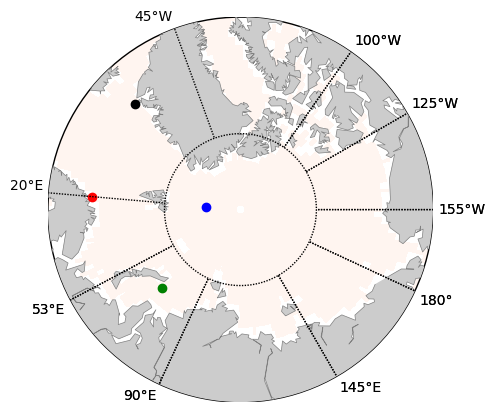

In [12]:
from mpl_toolkits.basemap import Basemap
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
m = Basemap(projection='npstere',round=True,
            boundinglat=65,
            lon_0=180+(-100+-30)/2.,resolution='c')
data, lon = add_cyclic_point(np.nanmean(ppC_ds.ppC_surf,axis=(0,1)), coord=ppC_ds.lon, axis=1)
x, y = m(*np.meshgrid(lon,ppC_ds.lat))
m.pcolormesh(x,y,data,shading='flat',cmap=plt.cm.get_cmap('Reds', 10))

x1, y1 = m(*np.meshgrid(ppC_ds.lon[160],ppC_ds.lat[160]))
m.plot(x1,y1,'o',color='k')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[200],ppC_ds.lat[160]))
m.plot(x1,y1,'o',color='r')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[200],ppC_ds.lat[175]))
m.plot(x1,y1,'o',color='b')

x1, y1 = m(*np.meshgrid(ppC_ds.lon[250],ppC_ds.lat[165]))
m.plot(x1,y1,'o',color='g')

m.drawmeridians((180,205), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((205,235), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((235,260), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((260,315), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((145,180), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((90,145), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((53,90), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawmeridians((20,53), color='k', textcolor='k', linewidth=1.0, 
              zorder=None, dashes=[1, 1], labels=[1, 1, 1, 1])
m.drawparallels((60,90), color='k', textcolor='k', 
                linewidth=1.0, zorder=None, dashes=[1, 1], 
                labels=[0, 0, 0, 0])
m.drawcoastlines(linewidth=0.5, linestyle='solid', color='gray', antialiased=1, ax=None, zorder=None)
m.fillcontinents(color='0.8', lake_color=None, ax=None, zorder=None, alpha=None)
m.plot
plt.show()

## Find the lons and lats for each of the regions
1. Black dot = Nordic region (near greenland) [70.5$^o$N,20$^o$W]
2. red dot = Nordic/Barents intersection [70.5$^o$N,20$^o$E]
3. Blue dot = Central Arctic [85.5$^o$N, 20$^o$E]
4. Green dot = Kara Sea [75.5$^o$N,70$^o$E ]

In [20]:
%%time
phytoC = np.stack([ppC_ds.ppC_surf, mp1C_ds.mp1C_surf, diazC_ds.diazC_surf, 
                               diat1C_ds.diat1C_surf, mp2C_ds.mp2C_surf, diat2C_ds.diat2C_surf, 
                               mp3C_ds.mp3C_surf, diat3C_ds.diat3C_surf, mp4C_ds.mp4C_surf])

phytoC = np.nanmean(phytoC, axis =0) # average through the 62 years

		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_var_all: ncid 0xd0000 varid 4
		NC4_inq_dim: ncid 0xd0000 dimid 0
		NC4_inq_dim: ncid 0xd0000 dimid 3
		NC4_inq_dim: ncid 0xd0000 dimid 2
		NC4_inq_dim: ncid 0xd0000 dimid 1
		NC4_inq_var_all: ncid 0xd0000 varid 4
			NC4_get_vars: var->hdr.name ppC_surf mem_nc_type 6
		NC4_inq_dim: ncid 0xd0000 dimid 0
			nc4_find_d

CPU times: user 5.82 s, sys: 20.3 s, total: 26.1 s
Wall time: 1min 22s


In [21]:
%%time
zooC = np.stack([zoo1C_ds.zoo1C, zoo2C_ds.zoo2C_150m, zoo3C_ds.zoo3C_150m, 
                               zoo4C_ds.zoo4C_150m, zoo5C_ds.zoo5C_150m, zoo6C_ds.zoo6C_150m])
zooC = np.nanmean(zooC, axis =0) # average through the 62 years

		NC4_inq_var_all: ncid 0x150000 varid 4
		NC4_inq_var_all: ncid 0x150000 varid 4
		NC4_inq_dim: ncid 0x150000 dimid 0
		NC4_inq_dim: ncid 0x150000 dimid 3
		NC4_inq_dim: ncid 0x150000 dimid 2
		NC4_inq_dim: ncid 0x150000 dimid 1
		NC4_inq_dim: ncid 0x150000 dimid 0
			nc4_find_dim_len: grp->name / dimid 0
		NC4_inq_dim: ncid 0x150000 dimid 3
		NC4_inq_dim: ncid 0x150000 dimid 2
		NC4_inq_dim: ncid 0x150000 dimid 1
		NC4_inq_var_all: ncid 0x150000 varid 4
		NC4_inq_var_all: ncid 0x150000 varid 4
		NC4_inq_dim: ncid 0x150000 dimid 0
		NC4_inq_dim: ncid 0x150000 dimid 3
		NC4_inq_dim: ncid 0x150000 dimid 2
		NC4_inq_dim: ncid 0x150000 dimid 1
		NC4_inq_var_all: ncid 0x150000 varid 4
		NC4_inq_var_all: ncid 0x150000 varid 4
		NC4_inq_dim: ncid 0x150000 dimid 0
		NC4_inq_dim: ncid 0x150000 dimid 3
		NC4_inq_dim: ncid 0x150000 dimid 2
		NC4_inq_dim: ncid 0x150000 dimid 1
		NC4_inq_var_all: ncid 0x150000 varid 4
			NC4_get_vars: var->hdr.name zoo1C mem_nc_type 6
		NC4_inq_dim: ncid 0x150000 

CPU times: user 3.15 s, sys: 5.86 s, total: 9.02 s
Wall time: 13.7 s


In [22]:
phytoC.shape

(62, 12, 180, 360)

In [23]:
k_phyto       = np.mean(phytoC[:,:,158:162,158:162],axis=(2,3))
b_phyto     = np.mean(phytoC[:,:,172:177,198:202],axis=(2,3))
r_phyto     = np.mean(phytoC[:,:,158:162,198:202],axis=(2,3))
g_phyto   = np.mean(phytoC[:,:,163:167,248:252],axis=(2,3))

In [24]:
k_zoo       = np.mean(zooC[:,:,158:162,158:162],axis=(2,3))
b_zoo     = np.mean(zooC[:,:,172:177,198:202],axis=(2,3))
r_zoo     = np.mean(zooC[:,:,158:162,198:202],axis=(2,3))
g_zoo   = np.mean(zooC[:,:,163:167,248:252],axis=(2,3))

In [25]:
month = np.arange(1, 13, 1)
month.shape

(12,)

In [26]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 30,
        }

## Kara Sea, Green region []

In [27]:
g_phyto.shape

(62, 12)

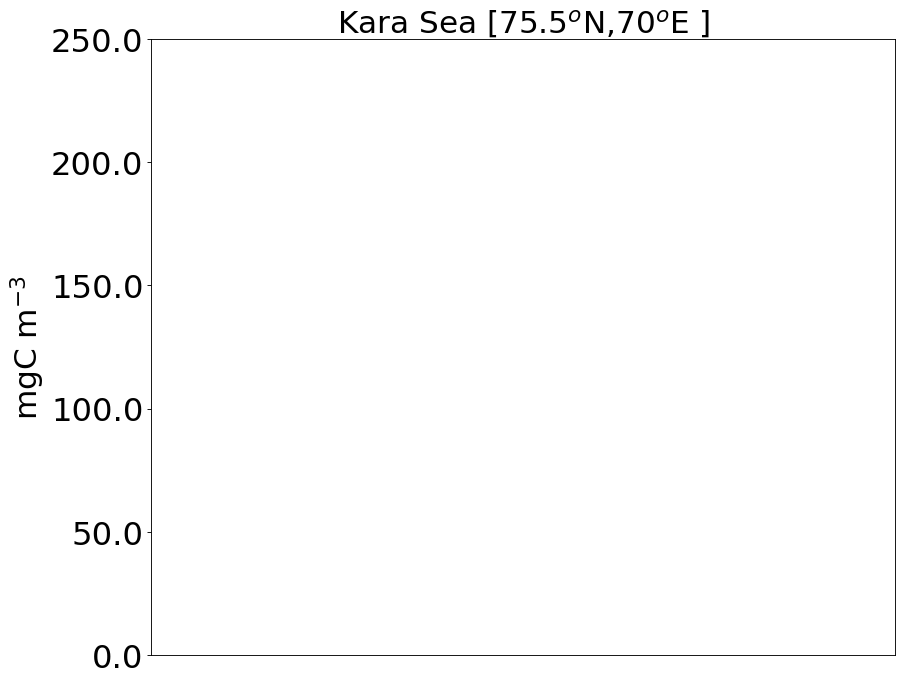

In [31]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,g_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,g_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,g_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,g_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,g_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,g_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,g_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,g_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,g_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,g_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,g_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,g_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,g_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,g_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,g_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=250)
pylab.title('Kara Sea [75.5$^o$N,70$^o$E ]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
#plt.ylim(top=250)
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}kara_sea_5deg_seasonal_succession_62yravg.png',dpi=600, bbox_inches='tight')

## Central Arctic, blue region

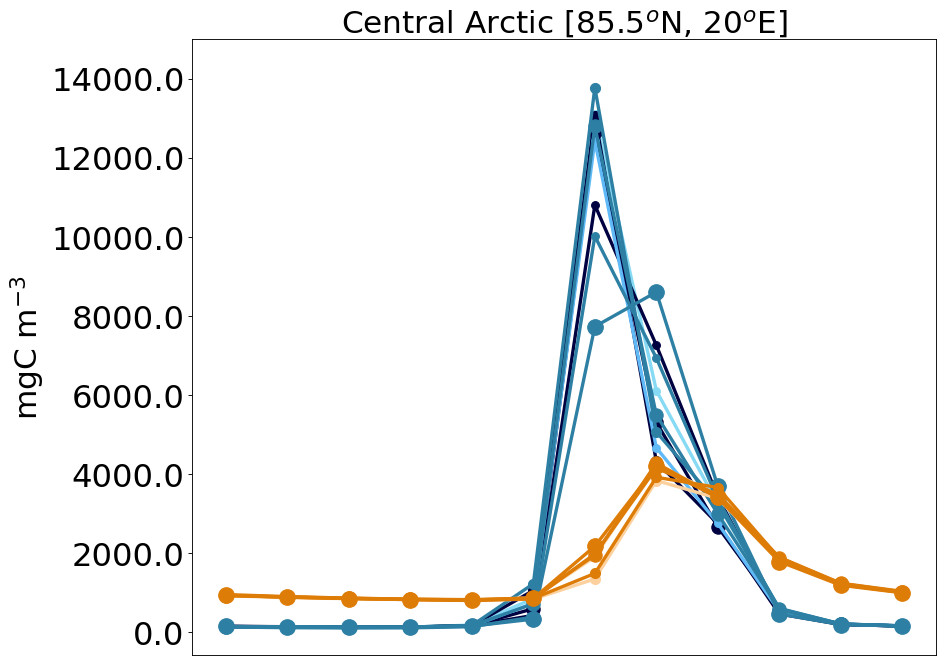

In [38]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,b_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,b_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,b_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,b_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,b_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,b_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,b_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,b_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,b_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,b_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,b_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,b_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,b_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,b_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,b_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=15000)
pylab.title('Central Arctic [85.5$^o$N, 20$^o$E]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
#plt.ylim(top=250)
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}central_arctic_5deg_seasonal_succession_62yravg.png',dpi=600, bbox_inches='tight')

## Nordic/Barents Intersection, Red region

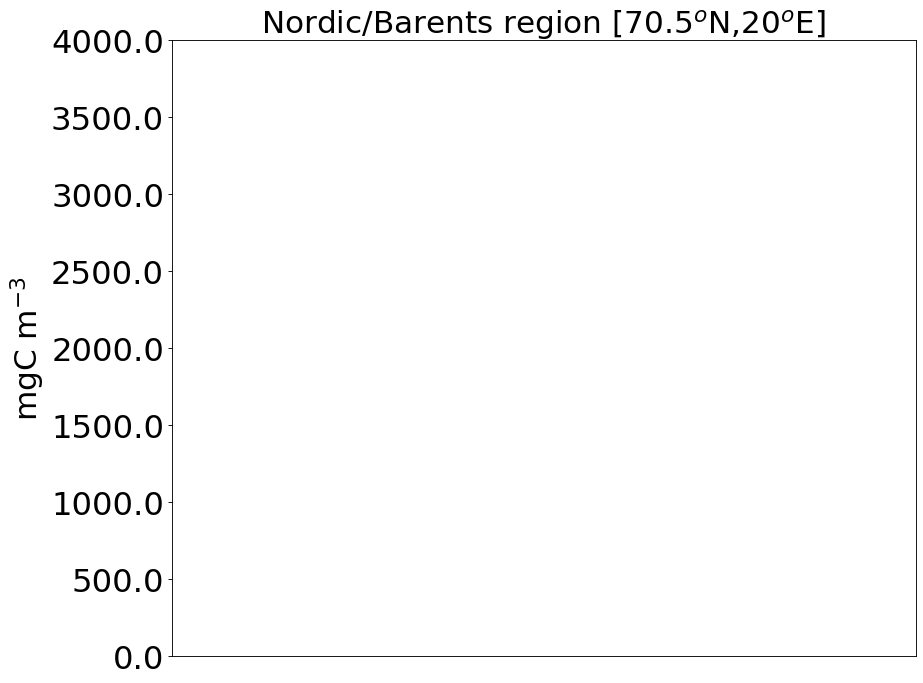

In [39]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,r_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,r_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,r_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,r_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,r_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,r_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,r_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,r_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,r_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,r_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,r_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,r_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,r_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,r_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,r_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=4000)
pylab.title('Nordic/Barents region [70.5$^o$N,20$^o$E]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
#plt.ylim(top=250)
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}Nordic_Barents_5deg_seasonal_succession_62yravg.png',dpi=600, bbox_inches='tight')

## Nordic/Greenland, black region 

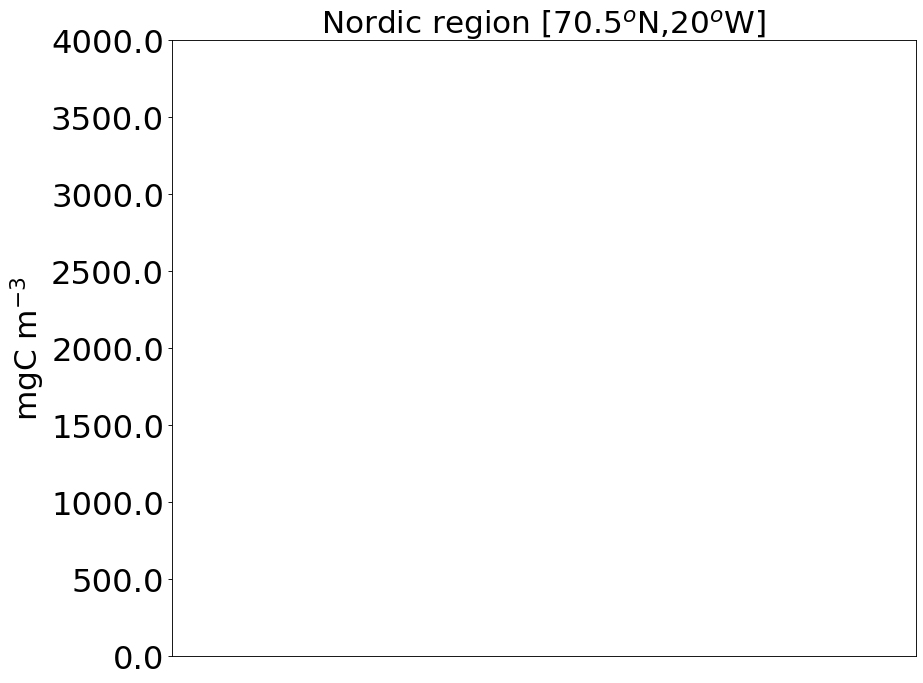

In [40]:
fig = figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
pylab.plot(month,k_phyto[0,:], '-o', color='#86daf4',markersize=7,linewidth = 3,label='picoplankton')
pylab.plot(month,k_phyto[3,:], '-o', color='#000140',markersize=7,linewidth = 3,label='diatom 1')
pylab.plot(month,k_phyto[5,:], '-o', color='#000140',markersize=9,linewidth = 3,label='diatom 2 ')
pylab.plot(month,k_phyto[7,:], '-o', color='#000140',markersize=12,linewidth = 3,label='diatom 3 ')
pylab.plot(month,k_phyto[2,:], '-o', color='#60baf7',markersize=7,linewidth = 3,label='diazotroph ')
pylab.plot(month,k_phyto[1,:], '-o', color='#2d80a4',markersize=7,linewidth = 3,label='mixed phytoplankton 1 ')
pylab.plot(month,k_phyto[4,:], '-o', color='#2d80a4',markersize=9,linewidth = 3,label='mixed phytoplankton 2 ')
pylab.plot(month,k_phyto[6,:], '-o', color='#2d80a4',markersize=12,linewidth = 3,label='mixed phytoplankton 3 ')
pylab.plot(month,k_phyto[8,:], '-o', color='#2d80a4',markersize=14,linewidth = 3,label='mixed phytoplankton 4 ')
pylab.plot(month,k_zoo[0,:], '-o', color='#FCD19E',markersize=7,linewidth = 3,label='micozooplankton 1')
pylab.plot(month,k_zoo[1,:], '-o', color='#FCD19E',markersize=9,linewidth = 3,label='micozooplankton 2')
pylab.plot(month,k_zoo[2,:], '-o', color='#DE7C08',markersize=7,linewidth = 3,label='mesozooplankton 1 ')
pylab.plot(month,k_zoo[3,:], '-o', color='#DE7C08',markersize=9,linewidth = 3,label='mesozooplankton 2 ')
pylab.plot(month,k_zoo[4,:], '-o', color='#DE7C08',markersize=12,linewidth = 3,label='mesozooplankton 3 ')
pylab.plot(month,k_zoo[5,:], '-o', color='#DE7C08',markersize=14,linewidth = 3,label='mesozooplankton 4 ')
#pylab.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
pylab.ylabel('mgC m$^{-3}$', fontsize=28)
plt.ylim(top=4000)
pylab.title('Nordic region [70.5$^o$N,20$^o$W]', fontsize=28)
from matplotlib.pyplot import gca
a = gca()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
a.set_yticklabels(a.get_yticks())
#plt.ylim(top=250)
plt.yticks(fontsize= 29,);plt.xticks(fontsize= 29);
pylab.show()
file = '/glade/u/home/gabyn/work/case_notes/analysis_figures/'
fig.savefig(f'{file}nordic_5deg_seasonal_succession_62yravg.png',dpi=600, bbox_inches='tight')

## Now check differences between warm and cold years?